In [1]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX

# cv2 haar

In [7]:
ppath='/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/cv2/data/'
cascPath = ppath+'haarcascade_frontalface_default.xml'
eyePath = ppath+'haarcascade_eye.xml'
smilePath = ppath+'haarcascade_smile.xml'
animePath = ppath+'lbpcascade_animeface.xml'
faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)
animeCascade = cv2.CascadeClassifier(animePath)

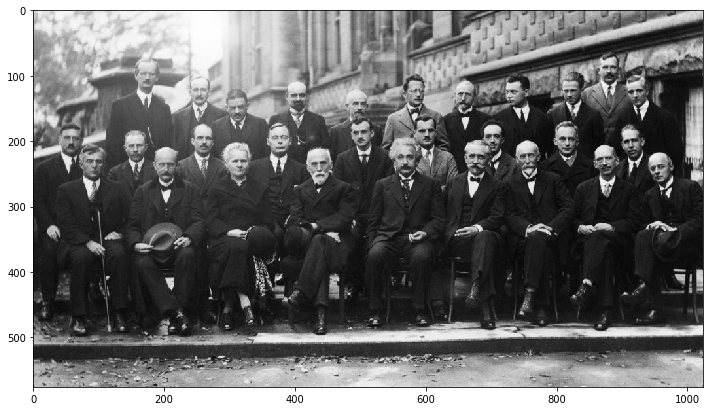

In [8]:
gray = cv2.imread('solvay.jpg', 0)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

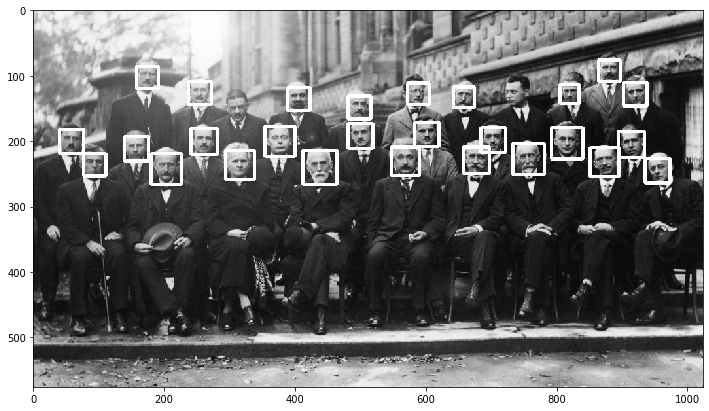

In [9]:
faces = faceCascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

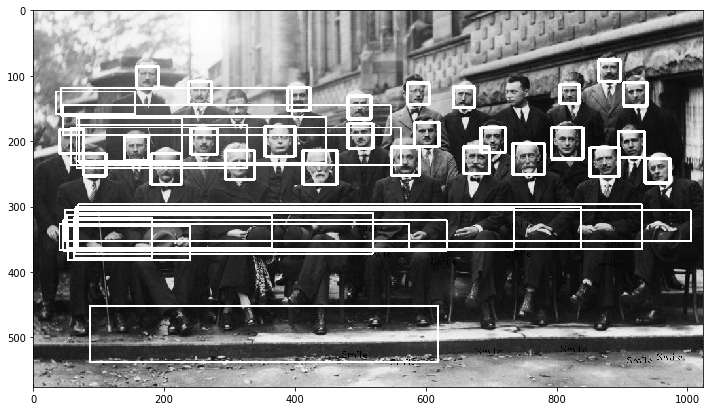

In [12]:
smile = smileCascade.detectMultiScale(
        gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
for (sx, sy, sw, sh) in smile:
    cv2.rectangle(gray, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
    cv2.putText(gray,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

# dlib hog

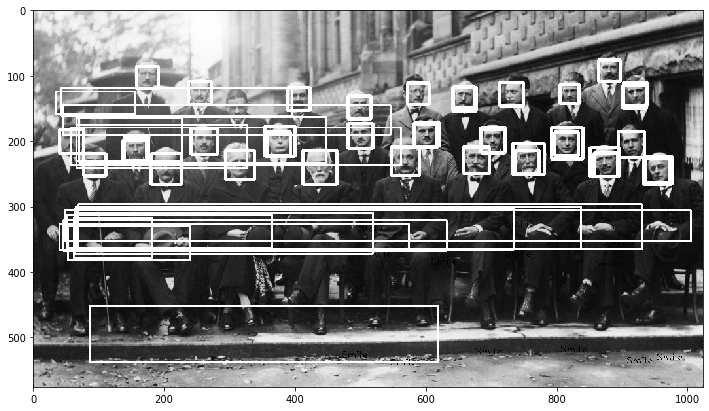

In [14]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [17]:
dnnFaceDetector = dlib.cnn_face_detection_model_v1('shape_predictor_68_face_landmarks.dat')

rects = dnnFaceDetector(gray, 1)
for (i, rect) in enumerate(rects):
    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()
    # Rectangle around the face
    cv2.rectangle(gray, (x1, y1), (x2, y2), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

RuntimeError: An error occurred while trying to read the first object from the file shape_predictor_68_face_landmarks.dat.
ERROR: Error deserializing object of type unsigned long
   while deserializing object of type std::string


# dlib dots

In [20]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image = cv2.imread('albert-einstein-9285408-1-402.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

In [ ]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x 
    h = rect.bottom() - y 
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
            coords[i] = (shape.part(i).x, shape.part(i).y)

    return coords

for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)

    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 0, 255), -1) 

cv2.imshow("Output", image)

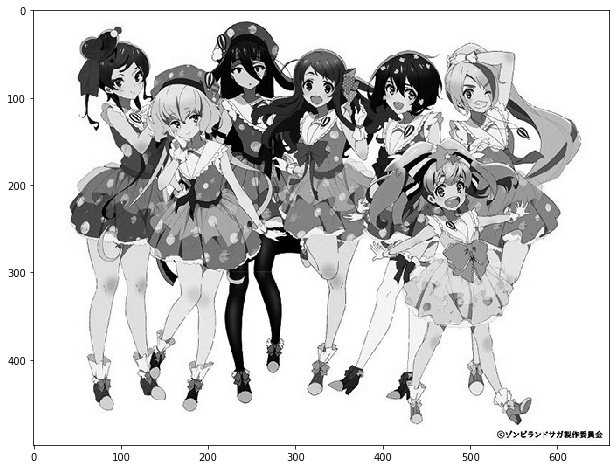

In [2]:
gray = cv2.imread('AS20190723003894_comm.jpg', 0)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

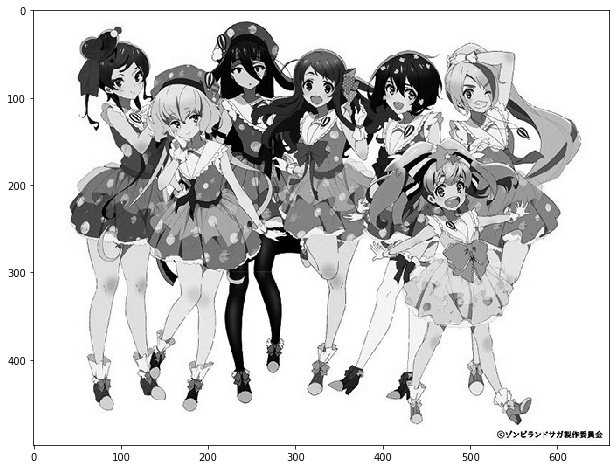

In [3]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

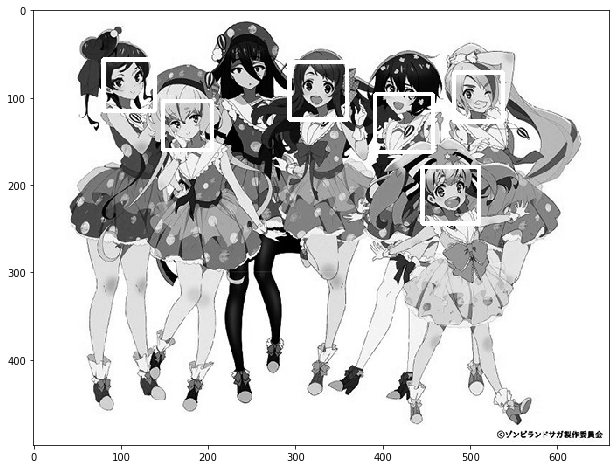

In [8]:
faces = animeCascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
for (x, y, w, h) in faces: 
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()